<a href="https://colab.research.google.com/github/TijsS/jupyterNotebook/blob/master/Copy_of_WijnOnderzoek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

Hier laden we de 'redwine.csv' dataset op uit onze github. Vanwege de Portugese namen gebruiken we 'cp1252' encoding.

In [0]:
url = 'https://raw.githubusercontent.com/TijsS/jupyterNotebook/master/redwine.csv?token=AKK5ONP7MMHJQAY75N6T6OC6M6RZY'
df = pd.read_csv(url,sep=';',index_col=0,encoding='cp1252')
df.head()

,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
242,Portugal,"This is a spicy, rich, smooth wine, immediatel...",Quinta das Setencostas,87,8.0,Alenquer,Joe Czerwinski,Casa Santos Lima 2009 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,8.2,0.39,0.38,1.5,0.058,10.0,29.0,0.9962,3.26,0.74,9.8
1332,Portugal,"Firm tannins give a dry character, Black fruit...",Quinta das Setencostas,86,NaN,Alenquer,Roger Voss,Casa Santos Lima 2010 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,7.9,0.35,0.21,1.9,0.073,46.0,102.0,0.9964,3.27,0.58,9.5
1366,Portugal,"Firmly tannic and dry, this is a textured wine...",Quinta das Setencostas,87,8.0,Alenquer,Paul Gregutt,Casa Santos Lima 2011 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,8.2,1.33,-,1.7,0.081,3.0,12.0,0.9964,3.53,0.49,10.9
2367,Portugal,"From a small sub-region of Lisboa, this stylis...",Quinta das Setencostas,90,11.0,Alenquer,Virginie Boone,Casa Santos Lima 2013 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5
2424,Portugal,"From a small sub-region of Lisboa, this stylis...",Quinta das Setencostas,90,11.0,Alenquer,Michael Schachner,Casa Santos Lima 2013 Quinta das Setencostas R...,Portuguese Red,Casa Santos Lima,8.5,0.37,0.2,2.8,0.090,18.0,58.0,0.998,3.34,0.70,9.6


Zoals hieronder te zien missen er wat kollomen zoals bijvoorbeeld 'alcohol' dit komt omdat ze niet goed zijn omgezet naar de float datatype

In [0]:
df.describe()

,points,price,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
count,2465.000000,2196.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,88.811359,24.819217,8.352819,0.528162,2.562353,0.087485,15.804665,47.218661,3.311201,0.660353
std,2.974000,25.539475,1.734847,0.178869,1.407030,0.047043,10.379218,33.187830,0.153927,0.172531
min,81.000000,5.000000,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,87.000000,12.000000,7.100000,0.400000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000
50%,88.000000,17.000000,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,91.000000,28.000000,9.300000,0.635000,2.600000,0.091000,21.000000,64.000000,3.400000,0.730000
max,100.000000,450.000000,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


Hier zetten we de datatype van de kolom om naar de float type zodat we er mee kunnen rekenen. De 'foutieve' waardes die in de kollom zitten maar niet kunnen worden omgezet naar float worden NaN waardes.

In [0]:
df['alcohol'] = df['alcohol'].apply(pd.to_numeric, errors='coerce', downcast='float')
df['density'] = df['density'].apply(pd.to_numeric, errors='coerce', downcast='float')
df['citric acid'] = df['citric acid'].apply(pd.to_numeric, errors='coerce', downcast='float')
df.dtypes

country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

hier wordt de missende data/foutieve data met de gemiddelde waardes van die kollom gevult.

In [0]:
df = df.fillna(df.mean())

Hieronder is te zien dat de kolomen die eerder niet te zien waren (bijv. alcohol) nu wel te zijn zijn en dat er dus mee te rekenen is.



In [0]:
df.describe()

,points,price,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,88.811359,24.819217,8.352819,0.528162,0.299425,2.562353,0.087485,15.804665,47.218661,2.189505,3.311201,0.660353,10.413523
std,2.974000,24.105097,1.734847,0.178869,0.177555,1.407030,0.047043,10.379218,33.187830,9.444523,0.153927,0.172531,1.049672
min,81.000000,5.000000,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.500000
25%,87.000000,12.000000,7.100000,0.400000,0.160000,1.900000,0.070000,7.000000,22.000000,0.995690,3.210000,0.550000,9.500000
50%,88.000000,19.000000,7.900000,0.520000,0.299425,2.200000,0.079000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000
75%,91.000000,25.000000,9.300000,0.635000,0.430000,2.600000,0.091000,21.000000,64.000000,0.997900,3.400000,0.730000,11.100000
max,100.000000,450.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369003,4.010000,2.000000,14.900000


We gaan nu individueel naar specifieke kolommen kijken.

provinces:

In [0]:
provincies = df['province'].nunique()
print("we werken met " + str(provincies) + " verschillende gebieden waar de wijn vandaan komen")

we werken met 30 verschillende gebieden waar de wijn vandaan komen


Prijs:

In [0]:
gemiddeldePrice = df['price'].mean()
maxPrice = df['price'].max()

print("de gemiddelde prijs van de wijnen is: " + str(gemiddeldePrice) + " euro")
print("de maximale prijs van de wijnen is: " + str(maxPrice) + " euro")


de gemiddelde prijs van de wijnen is: 24.81921675774146 euro
de maximale prijs van de wijnen is: 450.0 euro


Hieronder in de boxplot van de prijs van de wijn is te zien dat er erg veel uitschieters zijn. Dit zal ons dan ook kunnen helpen in de deelvragen 'Kun je op basis van de gemiddelde temperatuur wat zeggen over de prijs?' en 'Zorgt de prijs voor een wijn voor een significant verschil t.o.v. de score van de wijn?'.

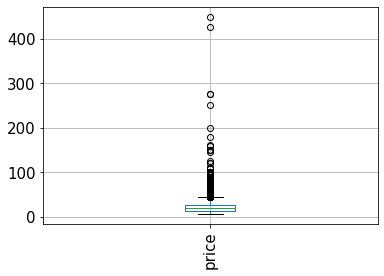

In [0]:
boxplot = df[['price']].boxplot(grid=True, rot=90, fontsize=15)

Score:

In [0]:
gemiddeldePoints = df['points'].mean()
maxPoints = df['points'].max()

print("de gemiddelde aantal punten van de wijnen is: " + str(gemiddeldePoints) + " punten")
print("de maximale aantal punten van de wijnen is: " + str(maxPoints) + " punten")

de gemiddelde aantal punten van de wijnen is: 88.81135902636917 punten
de maximale aantal punten van de wijnen is: 100 punten


In de boxplot is te zien dat er 2 uitschieters zijn. Terugkijkend naar de boxplot over prijs is te zien dat er ook 2 extreme uitschieters waren. Als dit dezelfde wijnen zijn lijkt het op eerste gezicht dat er misschien inderdaad een verband kan zijn tussen prijs en score.

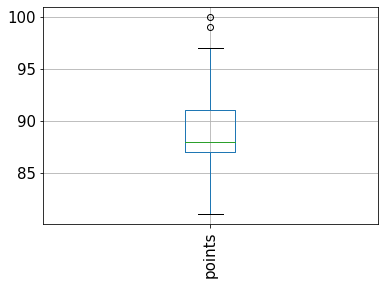

In [0]:
boxplot = df[['points']].boxplot(grid=True, rot=90, fontsize=15)

# Deelvraag: In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?


# Deelvraag: Heeft de proever voorkeur voor een bepaalde pH-waarde?

# Deelvraag: Zorgt de prijs voor een wijn voor een significant verschil t.o.v. de score van de wijn?

# Deelvraag: Kun je op basis van de gemiddelde temperatuur wat zeggen over de prijs?

De dataset van de temperaturen per (wijn)gebied wordt ingeladen. Weer met gebruik van 'cp1252' encoding.

In [0]:
urlTemperatureDataset = 'https://raw.githubusercontent.com/TijsS/jupyterNotebook/master/dataset.csv?token=AKK5ONMELG6E4E2OHQWM5UC6NI6MS'
Tempdf = pd.read_csv(urlTemperatureDataset,sep=';',index_col=0,encoding='cp1252')
Tempdf.head()

,temp,source
province,,
Minho,14.2,https://en.climate-data.org/europe/portugal/me...
Alentejano/Alentejo,14.5,https://en.climate-data.org/europe/portugal/al...
Trás-os-Montes,14.7,https://en.climate-data.org/europe/portugal/mi...
Beira Interior,15.4,https://nl.climate-data.org/europa/portugal/ca...
Dão/Terras do Dão,15.5,https://en.climate-data.org/europe/portugal/sa...


Eerst berekenen we de gemiddelde prijs per gebied. Hierna plaatsen we de gemmidelde temperatuur over een map van portugal in kleuren. We zetten dan de als we dit hebben gedaan de gemmidelde prijzen op de juiste locatie op de map van portugal. Nadat je dit hebt gedaan heb je een mooi overzicht van de prijs/temperatuur correlatie.